# Data Fields

Here's a brief version of what you'll find in the data description file.

- **SalePrice**: The property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale
th Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale


In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline

train = pd.read_csv('data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [128]:
# Check columns with nulls or missing values
columns_with_nulls = train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False)
columns_with_nulls

PoolQC          1453
MiscFeature     1406
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [107]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [129]:
#Check missing value in LotFrontage

mask = train['PoolQC'].isnull()
train[mask]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [109]:
#Replace missing values with mean

train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [110]:
#Check for missing values in Alley Column

AlleyNull = train['Alley'].isnull()
train[AlleyNull]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [111]:
#Check for distinct values of a column

distinctAlley = train['Alley'].unique()
distinctAlley

array([nan, 'Grvl', 'Pave'], dtype=object)

In [112]:
#Replace missing values for Alley with Unknown

train = train.fillna({'Alley':'Unknown'})
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [113]:
#Check for distinct values of Pool Quality

distinctPoolQC = train['PoolQC'].unique()
distinctPoolQC

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [114]:
#Check missing Electrical value
mask = train['Electrical'].isnull()
train[mask]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Unknown,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [115]:
#Replace a missing value in Electrical column with the most common

train['Electrical'].fillna(train['Electrical'].mode(), inplace=True)
train.loc[1379]

Id                 1380
MSSubClass           80
MSZoning             RL
LotFrontage        73.0
LotArea            9735
                  ...  
MoSold                5
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        167500
Name: 1379, Length: 81, dtype: object

In [116]:
# Split Dependant Variable

y = train[['SalePrice']]

In [117]:
# Split Independent Variable

x = train.drop(columns=['SalePrice'])
x.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.000000,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.000000,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.000000,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.000000,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.000000,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.000000,14115,Pave,Unknown,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.000000,10084,Pave,Unknown,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,70.049958,10382,Pave,Unknown,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.000000,6120,Pave,Unknown,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.000000,7420,Pave,Unknown,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [118]:
# Remove uneccesary column: Id
x = x.drop(columns=['Id'])

In [119]:
# Split numerical from categorical features

numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

In [120]:
# Remove NaN from categorical features
x[categorical_features] = x[categorical_features].fillna(0)

In [131]:
# Check columns with nulls or missing values
columns_with_nulls = x.isnull().sum()[x.isnull().sum() > 0].sort_values(ascending=False)
columns_with_nulls

GarageYrBlt    81
MasVnrArea      8
dtype: int64

In [135]:
#Check for missing values in GarageYrBlt Column
#reorder column to show GarageYrBlt first
cols = ['GarageYrBlt'] + [col for col in x.columns if col != 'GarageYrBlt']
x = x[cols]
GarageYrBlt = x['GarageYrBlt'].isnull()
x[GarageYrBlt]

,GarageYrBlt,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
39,NaN,40,0.782828,-2.293718e-01,-0.448677,-1.518467,-0.517200,-0.538802,-1.447101,-0.572835,...,False,False,False,True,False,True,False,False,False,False
48,NaN,49,3.147673,-1.682829e+00,-0.607428,-1.518467,-0.517200,-1.698028,1.120936,-0.572835,...,False,True,False,False,False,False,False,False,False,True
78,NaN,79,0.782828,8.857191e-02,0.026175,-1.518467,-0.517200,-0.108232,-0.817205,-0.572835,...,False,False,False,True,False,False,False,False,True,False
88,NaN,89,-0.163109,1.587449e+00,-0.205137,-2.241782,-3.214027,-1.863632,-0.138856,-0.572835,...,False,False,False,False,True,False,False,False,False,False
89,NaN,90,-0.872563,-4.564744e-01,-0.245226,-1.518467,-0.517200,0.752907,0.491040,-0.572835,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,NaN,1350,0.309859,-9.106796e-01,-0.527852,1.374795,-0.517200,-3.287824,0.103412,-0.572835,...,False,False,False,True,False,False,False,False,True,False
1407,NaN,1408,-0.872563,6.454645e-16,-0.174068,-0.795151,-0.517200,0.454820,0.006505,-0.572835,...,False,False,False,True,False,False,False,False,True,False
1449,NaN,1450,2.911188,-2.227875e+00,-0.900377,-0.795151,1.280685,-0.041991,-0.720298,-0.572835,...,False,False,False,True,True,False,False,False,False,False
1450,NaN,1451,0.782828,-4.564744e-01,-0.152020,-0.795151,-0.517200,0.090492,-0.526484,-0.572835,...,False,False,False,True,False,False,False,False,True,False


In [121]:
# Transfer categorical fields and encode into a numerical label

x = pd.get_dummies(train, columns = categorical_features)
x.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,False,False,False,True,False,False,False,False,True,False
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,False,False,False,True,False,False,False,False,True,False
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,False,False,False,True,False,False,False,False,True,False
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,False,False,False,True,True,False,False,False,False,False
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,False,False,False,True,False,False,False,False,True,False


In [122]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [123]:
x.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,False,False,False,True,False,False,False,False,True,False
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,False,False,False,True,False,False,False,False,True,False
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,False,False,False,True,False,False,False,False,True,False
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,False,False,False,True,True,False,False,False,False,False
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,False,False,False,True,False,False,False,False,True,False


<Axes: ylabel='Frequency'>

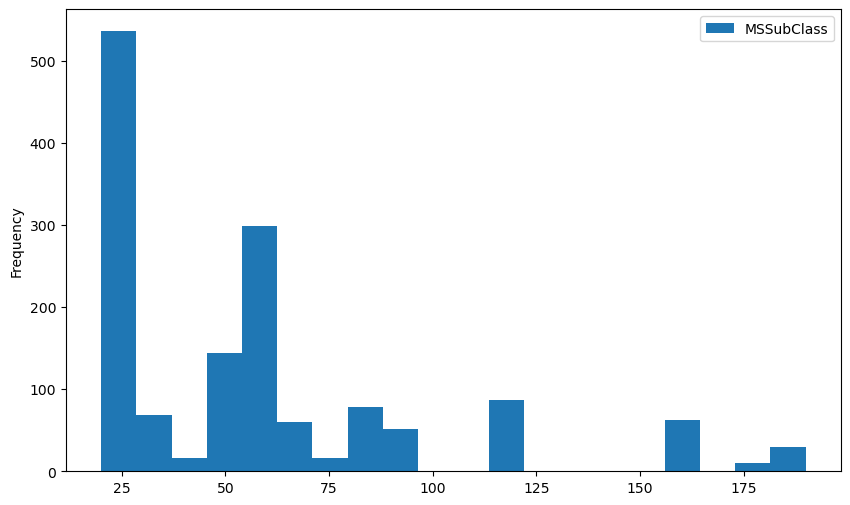

In [124]:
%matplotlib inline
x[['MSSubClass']].plot(kind = 'hist',
                           bins = 20,
                           figsize = (10,6))

In [125]:
x['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

<Axes: ylabel='Frequency'>

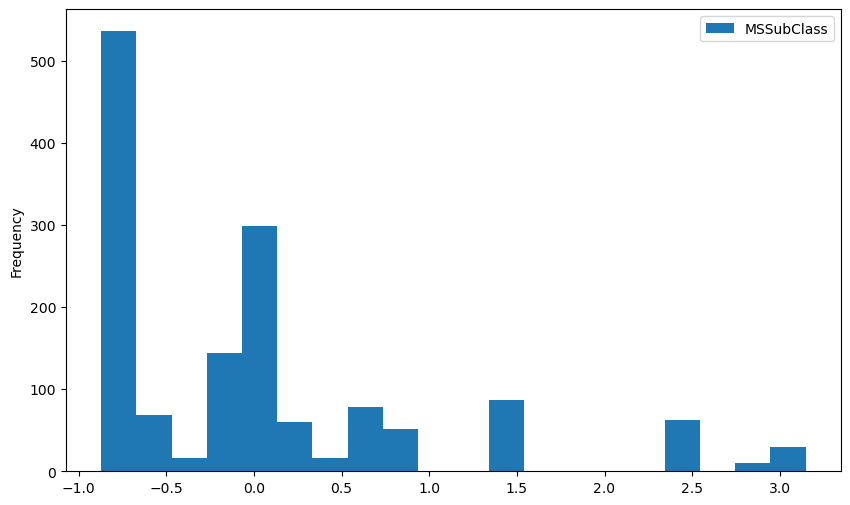

In [126]:
# normalise numerical features all at once using StandarScaler

scaler = StandardScaler()
x[numerical_features] = scaler.fit_transform(x[numerical_features])
%matplotlib inline
x[['MSSubClass']].plot(kind = 'hist',
                           bins = 20,
                           figsize = (10,6))

In [127]:
# Reduce Dimensionality using PCA

pca = PCA().fit(x)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()



ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values